In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib
from icecream import icecream as ic
import time
from sklearn.preprocessing import normalize

In [117]:
imported_module = importlib.import_module("boid")
importlib.reload(imported_module)
from boid import Boid

In [114]:
def polarization(input_flock):
    """
    Caluclates the polarization of the flock, a measure of global ordering. It represents how aligned the velocities of the individual birds are. The higher the number, the more aligned the birds
    are. A nonzero value indicates that the center of mass of the flock is moving. Bigger is better/more accurate for flocks
    :param input_flock:
    :return:
    """
    normed_vel = normalize(input_flock.velocities, axis=0)
    sum_vel = np.sum(normed_vel, axis=1)

    sum_vel = sum_vel / input_flock.boid_count

    order = np.linalg.norm(sum_vel)

    return order

In [66]:
size = 5
flock = Boid(count=size)
sum = polarization(flock)
print(sum)

0.8703775254048949


#For checking conditions

In [76]:
# Start from many random initial conditions.
# 2. For each initial condition, find the trajectory
# of the dynamical system for many steps.
# 3. Plot the points at the end of each trajectory
# How does the attractor depend on 𝜃𝜃?
# ● For small 𝜃𝜃, a point attractor
# ● Bifurcation at 𝜃𝜃 = 3 leads to a 2-cycle
# ● Period-doubling bifurcation (𝜃𝜃 ≈ 3.45)
# leads to 4-cycles
# ● For 𝜃𝜃 > 3.57, strange attractor and chao

size = 200
flock = Boid(count=size)
num_cond = 30
num_steps = 500

metrics = []

for i in range(num_cond):
    flock.reset_flock()
    flock.run(num_steps)
    polar = polarization(flock)
    metrics.append(polar)

nump = np.array(metrics)
print(np.mean(nump))

0.7207001841324401


# Varying parameters

In [120]:
# Start from many random initial conditions.
# 2. For each initial condition, find the trajectory
# of the dynamical system for many steps.
# 3. Plot the points at the end of each trajectory
# How does the attractor depend on 𝜃𝜃?
# ● For small 𝜃𝜃, a point attractor
# ● Bifurcation at 𝜃𝜃 = 3 leads to a 2-cycle
# ● Period-doubling bifurcation (𝜃𝜃 ≈ 3.45)
# leads to 4-cycles
# ● For 𝜃𝜃 > 3.57, strange attractor and chao

size = 200
flock = Boid(count=size, width=400, height=400)
num_cond = 15
num_steps = 400

same_param = []
metrics = []

centering = np.linspace(0.0005, 1, num=50)
separation = np.linspace(0.01, 1, num=50)
align = np.linspace(0.01, 1, num=50)
# print(centering)

start_time = time.time()
for param in align:
    for i in range(num_cond):
        flock.reset_flock()
        flock.run(num_steps)
        polar = polarization(flock)
        same_param.append(polar)
    metrics.append(same_param)

print((time.time() - start_time) / 60)
# nump = np.array(metrics)
# print(np.mean(nump))
print(metrics)


KeyboardInterrupt: 

# Display

In [119]:
for i in range(10):
    print(np.mean(metrics))

0.8019106044435874
0.8019106044435874
0.8019106044435874
0.8019106044435874
0.8019106044435874
0.8019106044435874
0.8019106044435874
0.8019106044435874
0.8019106044435874
0.8019106044435874


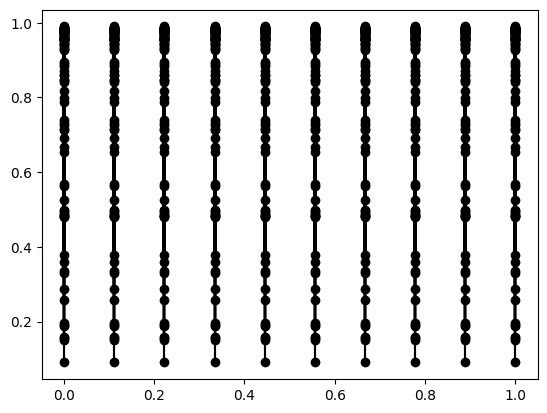

In [111]:
for i, param in enumerate(centering):
    plt.plot([param] * len(metrics[i]), metrics[i], marker='o', color='black')

plt.show()